# Introduction to PyTorch

Python-based scientific computing package for two main purposes:

* Replacement for **NumPy** to use the power of GPUs
* **Deep learning** research platform that provides maximum flexibility and speed

### 1) Basic operations

In [34]:
import torch
import numpy as np


x = np.zeros((3, 4))
print(x)

z = torch.randn(3, 4)
print(z)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
tensor([[ 1.9677,  1.1586, -0.0767,  0.4587],
        [-1.5482, -1.9995,  0.1245, -2.0166],
        [ 1.3429,  0.7687,  0.6820, -1.5540]])


In [35]:
print(3 * z)
w = torch.tensor([1.0, 2.0, 3.0, 4.0])
print(w)
print(z * w)
print(torch.matmul(z, w))

tensor([[ 5.9030,  3.4757, -0.2302,  1.3761],
        [-4.6447, -5.9986,  0.3734, -6.0497],
        [ 4.0287,  2.3060,  2.0459, -4.6619]])
tensor([1., 2., 3., 4.])
tensor([[ 1.9677,  2.3172, -0.2302,  1.8348],
        [-1.5482, -3.9991,  0.3734, -8.0662],
        [ 1.3429,  1.5373,  2.0459, -6.2159]])
tensor([  5.8894, -13.2402,  -1.2898])


### 2) Bridge to NumPy

In [36]:
q = w.numpy()
print(q)

a = torch.tensor(q)
print(a)

[1. 2. 3. 4.]
tensor([1., 2., 3., 4.])


### 3) Automatic Differentiation

In [37]:
x = torch.tensor(5.0, requires_grad=True)
y = torch.tensor(4.0, requires_grad=True)

z = x * y

z.backward()

print(x.grad)
print(y.grad)

tensor(4.)
tensor(5.)


### 4) Linear regression example

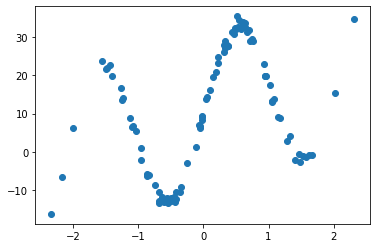

In [38]:
n = 100
data_x = torch.randn(n, 1)
data_y = 20*torch.sin(data_x*3) + data_x * 5 + 10
data_y += torch.randn(data_y.shape)

import matplotlib.pyplot as plt
plt.scatter(data_x, data_y)

In [39]:
import torch.nn as nn

class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.lin1 = nn.Linear(1, 20)
    self.non_lin = nn.Tanh()
    self.lin2 = nn.Linear(20, 1)

  def forward(self, x):
    z1 = self.lin1(x)
    z2 = self.non_lin(z1) 
    return self.lin2(z2)


model = MyModel()
print(model)

MyModel(
  (lin1): Linear(in_features=1, out_features=20, bias=True)
  (non_lin): Tanh()
  (lin2): Linear(in_features=20, out_features=1, bias=True)
)


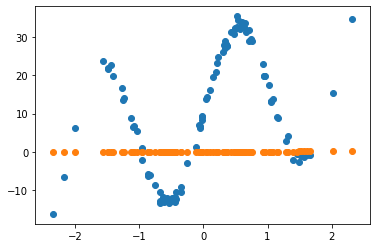

In [40]:
plt.scatter(data_x, data_y)
plt.scatter(data_x, model(data_x).detach())

In [41]:
print(torch.cuda.is_available())

True


In [42]:
from torch.optim import SGD
from torch.nn import MSELoss

lr = 0.01
iterations = 20000

optimizer = SGD(model.parameters(), lr=lr)
loss_function = MSELoss()

device = 'cuda'

model.to(device)
data_x = data_x.to(device)
data_y = data_y.to(device)

for i in range(iterations):
  optimizer.zero_grad()
  loss = loss_function(model(data_x), data_y)
  loss.backward()
  optimizer.step()
  if i % 100 == 0:
    print('iter: %d %.5f' % (i, loss.item()))

iter: 0 386.14328
iter: 100 93.71561
iter: 200 62.03193
iter: 300 42.60267
iter: 400 34.36275
iter: 500 29.61246
iter: 600 26.47130
iter: 700 24.28864
iter: 800 22.68738
iter: 900 21.45460
iter: 1000 20.47137
iter: 1100 19.66786
iter: 1200 18.99996
iter: 1300 18.43756
iter: 1400 17.95881
iter: 1500 17.54709
iter: 1600 17.18959
iter: 1700 16.87626
iter: 1800 16.59924
iter: 1900 16.35244
iter: 2000 16.13116
iter: 2100 15.93168
iter: 2200 15.75116
iter: 2300 15.58722
iter: 2400 15.43797
iter: 2500 15.30172
iter: 2600 15.17702
iter: 2700 15.06248
iter: 2800 14.95669
iter: 2900 14.85793
iter: 3000 14.76331
iter: 3100 14.66504
iter: 3200 14.51610
iter: 3300 13.60255
iter: 3400 13.02129
iter: 3500 12.33641
iter: 3600 11.53482
iter: 3700 10.66041
iter: 3800 9.76482
iter: 3900 8.89191
iter: 4000 8.07122
iter: 4100 7.31877
iter: 4200 6.64067
iter: 4300 6.03675
iter: 4400 5.50321
iter: 4500 5.03435
iter: 4600 4.62357
iter: 4700 4.26417
iter: 4800 3.94962
iter: 4900 3.67389
iter: 5000 3.43152
iter

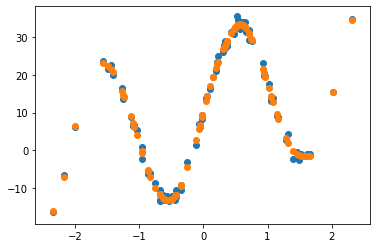

In [43]:
plt.scatter(data_x.cpu(), data_y.cpu())
plt.scatter(data_x.cpu(), model(data_x).detach().cpu())

In [44]:
print(model.lin1.bias)
print(model.lin1.weight)

Parameter containing:
tensor([ -6.6750,  -7.0717,  -3.2948,  -0.1356,   0.1175,  -1.7668,  -3.7443,
          4.1674,   2.0902,   0.2178,   1.8374, -10.9563,   1.1233,  -1.8274,
         -5.0508,  -5.0630,   0.0999,   4.7779,   3.0370,   4.2586],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 5.3422],
        [-3.4501],
        [ 4.8940],
        [ 4.1453],
        [-4.0180],
        [-5.5685],
        [-4.0495],
        [-4.3635],
        [-4.4534],
        [ 1.9496],
        [-3.9773],
        [ 5.3740],
        [ 2.1721],
        [-2.3386],
        [ 5.0613],
        [-3.8690],
        [ 3.7755],
        [ 3.9035],
        [-4.4958],
        [ 4.5690]], device='cuda:0', requires_grad=True)
